In [2]:
!pip install IPython

In [3]:
from IPython.display import Image

## 다운로드 과정 
##### AI hub 사이트 -> "대규모 웹데이터 기반 한국어 말뭉치" 검색 -> 밑에 사진과 같이 선택하여 원하는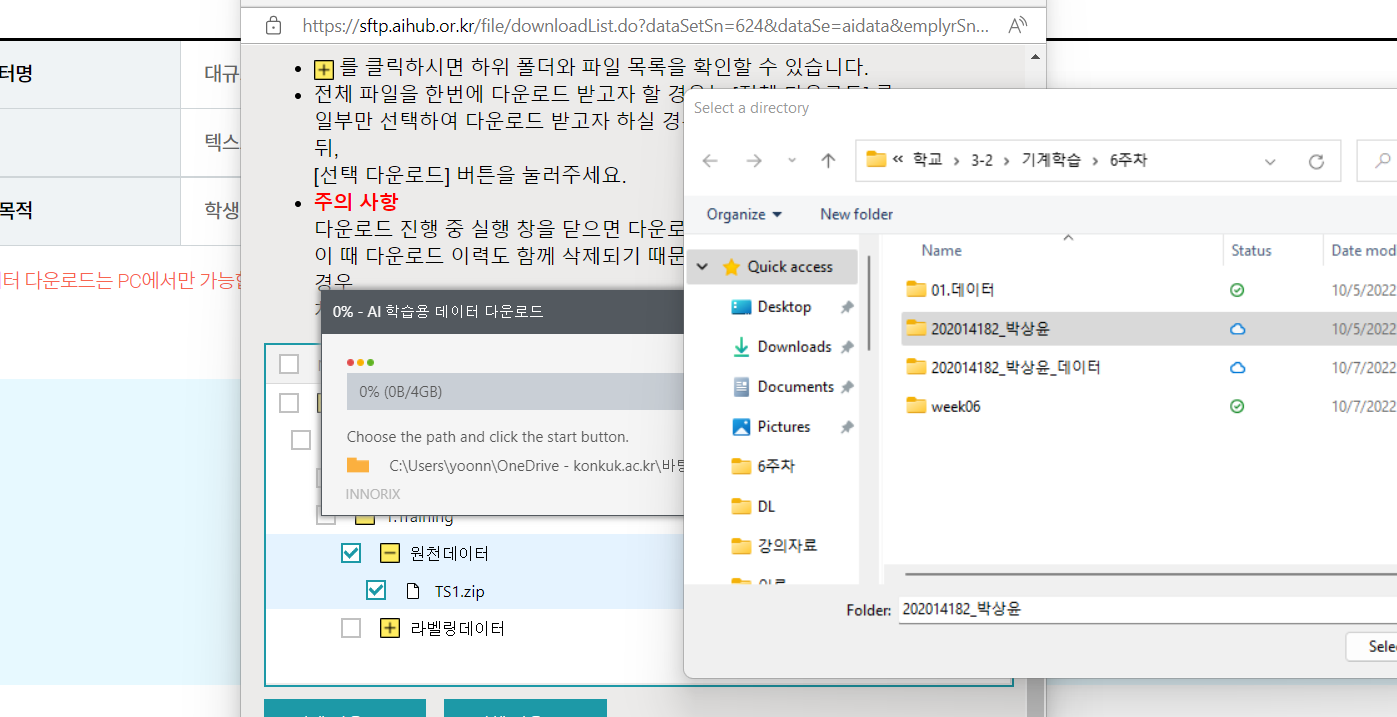 파일에 다운로드

In [1]:
import json

#파일이 여러개면 전체를 반복문으로 감싸기

#최종 process data 저장 => 한꺼번에 저장
preprocessed_data = []

#파일 열기
#각 도메인별 10개의 json파일 약 100개씩 데이터 추출
for i in range(71, 81):
    with open("202014182_박상윤/정치/BWPO2170000448"+str(i)+".json", 'r', encoding='utf-8') as f:
        json_data = json.load(f)
        
        #json data에서 text추출
        text_data = json_data["SJML"]["text"]
    
        #개별 text에서 각각의 content추출=>"."으로 나눈 후 처음 문장을 current_data로 저장(.모두 생략됨)
        for text in text_data:
            data_candidates = text["content"].split(".")
         
            #찾고자 하는 문장
            sentence = ""
        
            #데이터에서 앞뒤 공백 제거=>'.'만 있거나(길이가 0), '다'로 끝나는 것은 invalid data
            for data in data_candidates:
                data = data.strip()
                
                if len(data) != 0 and data[-1] == "다":
                    sentence = data
                 
                    break
            
            #문장의 단어 배열 - 띄어쓰기로 구분
            words = sentence.split(" ")
        
            #전체 띄어쓰기 제거
            sentence = sentence.replace(" ", "")
            #모든 음절에 띄어쓰기 " " 추가
            sentence = " ".join(sentence)
            # 맨 뒤에 "." tab 추가 (split에 의해 "."이 생략 되었으므로)
            sentence = sentence+".\t"
    
            for word in words:
                sentence = sentence+"B "
                sentence = sentence+"I "*(len(word)-1)
            
            #마지막 "."에 해당하는 I와 enter append(split에 의해 "."이 생략 되었으므로)
            sentence = sentence+"I\n"
            #데이터 배열에 추가 
            preprocessed_data.append(sentence)
        
    #file에 쓰기 
    with open("spacing_text9.txt", "a") as f:
        f.writelines(preprocessed_data)
        

In [13]:
#10개의 txt파일을 하나의 txt파일로 병합
filenames = ['spacing_text1.txt', 'spacing_text2.txt', 'spacing_text3.txt', ...]

with open('spacing_text.txt', 'w') as outfile:
    for filename in filenames:
        with open(filename) as file:
            for line in file:
                outfile.write(line)


TypeError: expected str, bytes or os.PathLike object, not ellipsis